# 
# ARIMA and Seasonal ARIMA
# Autoregressive Integrated Moving Averages

T# he general process for ARIMA models is the following:

    Visualize the Time Series Data
    Make the time series data stationary
    Plot the Correlation and AutoCorrelation Charts
    Construct the ARIMA Model or Seasonal ARIMA based on the data
    Use the model to make predictions

Let's go through these steps!


In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:


df=pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')

In [16]:
df.head()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange
0,20211001,1701336,1492856,2.8083,0.2,175
1,20211002,1696106,1467425,2.8083,0.2,175
2,20211003,1453001,1285924,2.8083,0.2,175
3,20211004,1640321,1468526,2.8083,0.2,175
4,20211005,1634891,1458419,2.8083,0.2,175


In [17]:
df.head()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange
0,20211001,1701336,1492856,2.8083,0.2,175
1,20211002,1696106,1467425,2.8083,0.2,175
2,20211003,1453001,1285924,2.8083,0.2,175
3,20211004,1640321,1468526,2.8083,0.2,175
4,20211005,1634891,1458419,2.8083,0.2,175


In [18]:
df.shape

(733, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   part_date                733 non-null    int64  
 1   cdr_og_netone_call_cnt   733 non-null    int64  
 2   cdr_og_netone_call_mins  733 non-null    int64  
 3   tariff_rate              733 non-null    float64
 4   termination_rate         733 non-null    float64
 5   rtgs_interbank_exchange  733 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.5 KB


In [20]:
df.isnull().sum()

part_date                  0
cdr_og_netone_call_cnt     0
cdr_og_netone_call_mins    0
tariff_rate                0
termination_rate           0
rtgs_interbank_exchange    0
dtype: int64

In [21]:


## Cleaning up the data
df.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
df.head()



,Date,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate
0,20211001,1701336,1492856,2.8083,0.2,175
1,20211002,1696106,1467425,2.8083,0.2,175
2,20211003,1453001,1285924,2.8083,0.2,175
3,20211004,1640321,1468526,2.8083,0.2,175
4,20211005,1634891,1458419,2.8083,0.2,175


In [22]:
df.isnull().sum()

Date                0
no_of_calls         0
usage_mins          0
tarriff_rate        0
termination_rate    0
rtgs_rate           0
dtype: int64

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.set_index('Date', inplace=True)

In [28]:
df.head()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate
Date,,,,,
2021-10-01,1701336,1492856,2.8083,0.2,175
2021-10-02,1696106,1467425,2.8083,0.2,175
2021-10-03,1453001,1285924,2.8083,0.2,175
2021-10-04,1640321,1468526,2.8083,0.2,175
2021-10-05,1634891,1458419,2.8083,0.2,175


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_calls,733.0,2.185890e+06,344619.488374,1.265995e+06,1.941277e+06,2.240450e+06,2.418613e+06,3.362320e+06
usage_mins,733.0,2.249921e+06,511424.310056,1.173534e+06,1.793941e+06,2.352014e+06,2.571403e+06,3.337477e+06
tarriff_rate,733.0,1.144287e+01,9.630959,2.808300e+00,2.808300e+00,7.273750e+00,2.636260e+01,2.636260e+01
termination_rate,733.0,2.293151e-01,0.028101,2.000000e-01,2.000000e-01,2.340000e-01,2.600000e-01,2.600000e-01
rtgs_rate,733.0,1.768827e+03,2388.194579,1.750000e+02,2.650000e+02,7.800000e+02,1.250000e+03,7.500000e+03


In [31]:
# visualize the data

<AxesSubplot:xlabel='Date'>

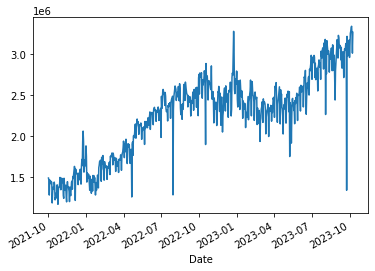

In [48]:

df['usage_mins'].plot()

In [35]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [36]:
df.columns

Index(['no_of_calls', 'usage_mins', 'tarriff_rate', 'termination_rate',
       'rtgs_rate'],
      dtype='object')

In [37]:


test_result=adfuller(df['usage_mins'])



In [38]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(usage_mins):
    result=adfuller(usage_mins)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [39]:
adfuller_test(df['usage_mins'])

ADF Test Statistic : -0.8999771359009149
p-value : 0.7879799470542266
#Lags Used : 20
Number of Observations Used : 712
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# differencing

In [40]:


df['usage First Difference'] = df['usage_mins'] - df['usage_mins'].shift(1)



In [41]:
df.head()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,usage First Difference
Date,,,,,,
2021-10-01,1701336,1492856,2.8083,0.2,175,NaN
2021-10-02,1696106,1467425,2.8083,0.2,175,-25431.0
2021-10-03,1453001,1285924,2.8083,0.2,175,-181501.0
2021-10-04,1640321,1468526,2.8083,0.2,175,182602.0
2021-10-05,1634891,1458419,2.8083,0.2,175,-10107.0


In [42]:


df['usage_mins'].shift(1)



Date
2021-10-01          NaN
2021-10-02    1492856.0
2021-10-03    1467425.0
2021-10-04    1285924.0
2021-10-05    1468526.0
                ...    
2023-10-05    3277086.0
2023-10-06    3320986.0
2023-10-07    3337477.0
2023-10-08    3244892.0
2023-10-09    3010839.0
Name: usage_mins, Length: 733, dtype: float64

In [90]:
df['Seasonal First Difference']=df['usage_mins']-df['usage_mins'].shift(6)

In [91]:
df.head()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,usage First Difference,Seasonal First Difference,forecast
Date,,,,,,,,
2021-10-01,1701336,1492856,2.8083,0.2,175,NaN,NaN,NaN
2021-10-02,1696106,1467425,2.8083,0.2,175,-25431.0,NaN,NaN
2021-10-03,1453001,1285924,2.8083,0.2,175,-181501.0,NaN,NaN
2021-10-04,1640321,1468526,2.8083,0.2,175,182602.0,NaN,NaN
2021-10-05,1634891,1458419,2.8083,0.2,175,-10107.0,NaN,NaN


In [92]:
df.head(14)

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,usage First Difference,Seasonal First Difference,forecast
Date,,,,,,,,
2021-10-01,1701336,1492856,2.8083,0.2,175,NaN,NaN,NaN
2021-10-02,1696106,1467425,2.8083,0.2,175,-25431.0,NaN,NaN
2021-10-03,1453001,1285924,2.8083,0.2,175,-181501.0,NaN,NaN
2021-10-04,1640321,1468526,2.8083,0.2,175,182602.0,NaN,NaN
2021-10-05,1634891,1458419,2.8083,0.2,175,-10107.0,NaN,NaN
2021-10-06,1645521,1461445,2.8083,0.2,175,3026.0,NaN,NaN
2021-10-07,1611786,1423239,2.8083,0.2,175,-38206.0,-69617.0,NaN
2021-10-08,1662723,1448083,2.8083,0.2,185,24844.0,-19342.0,NaN
2021-10-09,1701948,1439119,2.8083,0.2,185,-8964.0,153195.0,NaN


In [93]:


## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -7.172154839660336
p-value : 2.786447185982514e-10
#Lags Used : 18
Number of Observations Used : 708
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


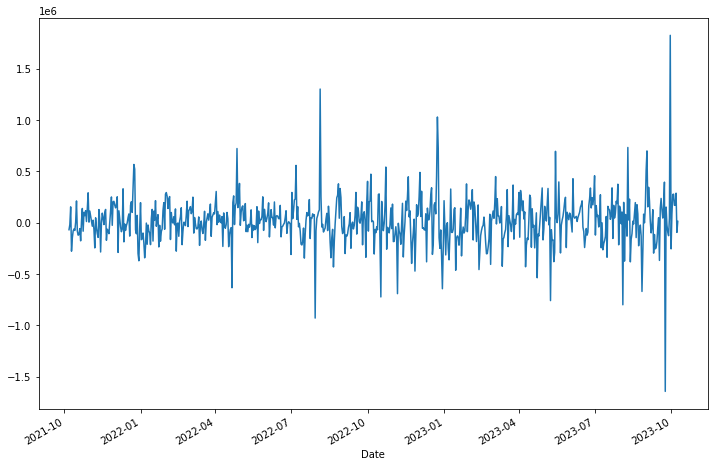

In [145]:
fig = plt.figure(figsize=(12, 8))
fig =df['Seasonal First Difference'].plot()

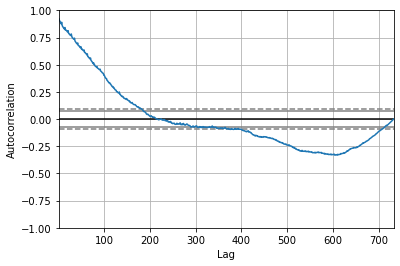

In [95]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['usage_mins'])
plt.show()



Final Thoughts on Autocorrelation and Partial Autocorrelation

    Identification of an AR model is often best done with the PACF.
        For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

    Identification of an MA model is often best done with the ACF rather than the PACF.
        For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

    p,d,q p AR model lags d differencing q MA lags



In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


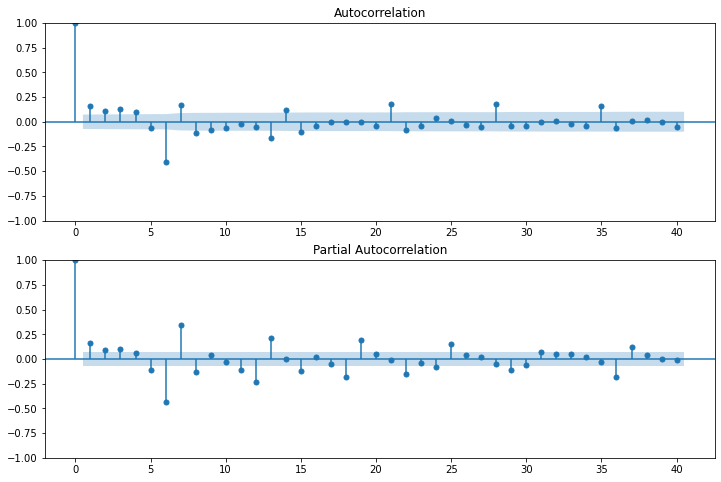

In [97]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[7:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)  # Corrected line
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[7:], lags=40, ax=ax2)


In [98]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [99]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['usage_mins'], order=(1, 1, 1))
model_fit = model.fit()

# You can continue with your analysis here


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [100]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             usage_mins   No. Observations:                  733
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9827.380
Date:                Wed, 11 Oct 2023   AIC                          19660.759
Time:                        16:39:46   BIC                          19674.546
Sample:                             0   HQIC                         19666.078
                                - 733                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1609      0.032      5.051      0.000       0.098       0.223
ma.L1         -0.8134      0.029    -28.475      0.000      -0.869      -0.757
sigma2      2.762e+10   9.29e-13   2.97e+22      0.000    2.76e+10    2.76e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             15240.19
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                            -2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.83e+37. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

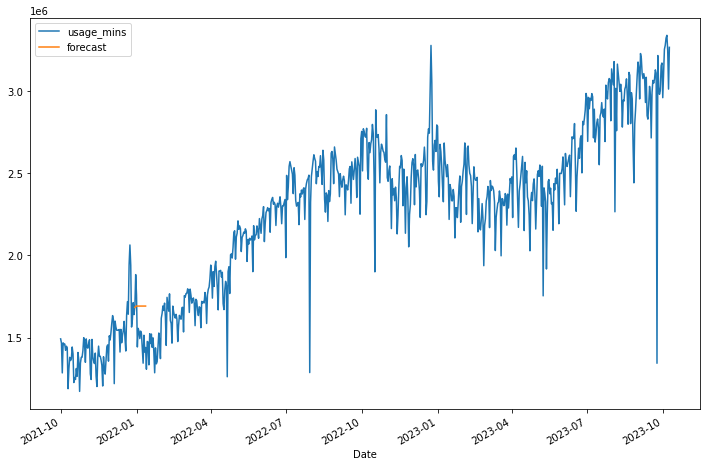

In [101]:


df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['usage_mins','forecast']].plot(figsize=(12,8))



In [102]:


import statsmodels.api as sm



In [103]:


model=sm.tsa.statespace.SARIMAX(df['usage_mins'],order=(1, 1, 1),seasonal_order=(1,1,1,6))
results=model.fit()



C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

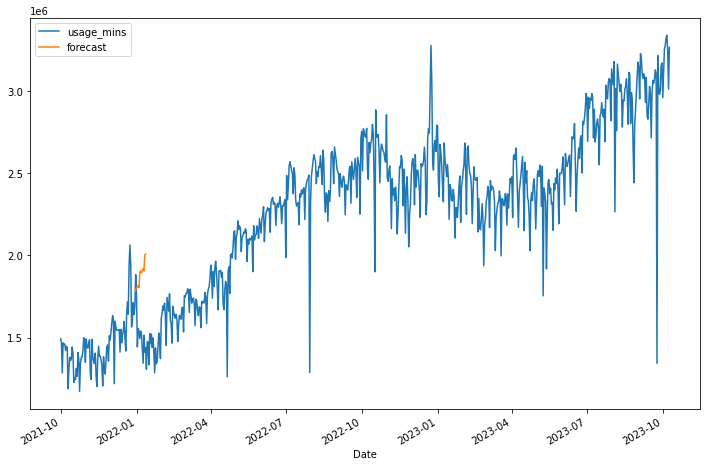

In [104]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['usage_mins','forecast']].plot(figsize=(12,8))

In [105]:


from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]



In [106]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [107]:
future_datest_df.tail()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,usage First Difference,Seasonal First Difference,forecast
2025-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

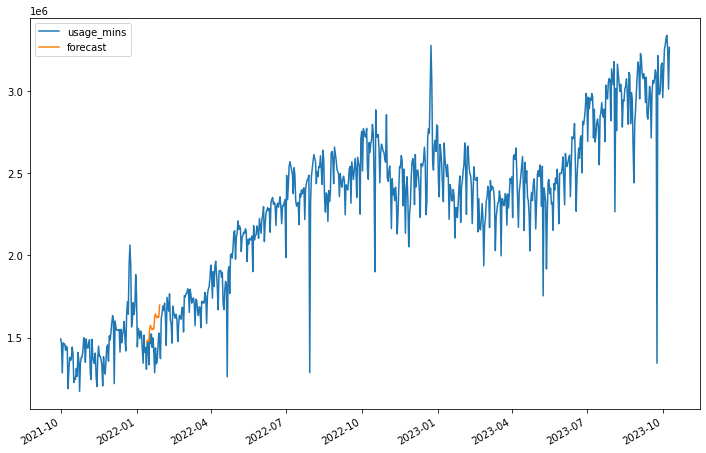

In [109]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['usage_mins', 'forecast']].plot(figsize=(12, 8)) 

In [111]:
from statsmodels.tsa.arima.model import ARIMA

# Specify the column you want to use as the dependent variable
endog_column = 'usage_mins'

model = ARIMA(df[endog_column], order=(0, 1, 1))
results_ARIMA = model.fit()

results_ARIMA.summary()


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             usage_mins   No. Observations:                  733
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -9832.067
Date:                Wed, 11 Oct 2023   AIC                          19668.133
Time:                        16:45:30   BIC                          19677.325
Sample:                             0   HQIC                         19671.679
                                - 733                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7295      0.018    -40.501      0.000      -0.765      -0.694
sigma2      2.783e+10   2.62e-13   1.06e+23      0.000    2.78e+10    2.78e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.99   Jarque-Bera (JB):             14488.09
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -2.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [112]:
forecasted_values = results_ARIMA.forecast(3)
forecasted_value_at_index_0 = forecasted_values.iloc[0]

print(forecasted_value_at_index_0)


3198541.8569795606


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


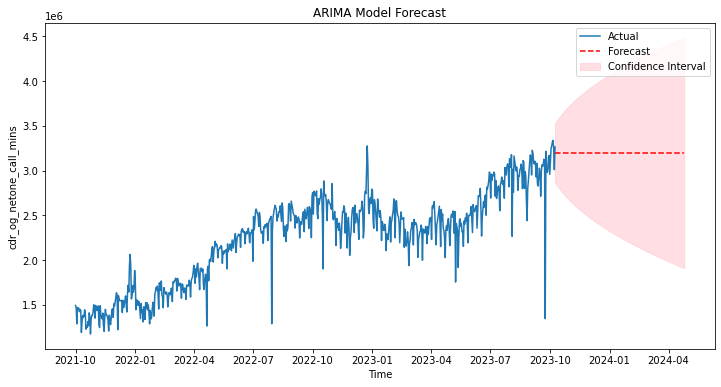

In [114]:
# Get a forecast object with confidence intervals
forecast = results_ARIMA.get_forecast(steps=200)

# Extract the mean forecast values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a range of indices for the forecasted values
forecast_index = pd.date_range(start=df.index[-1], periods=200, freq='D')

# Plot the actual values, forecasted values, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['usage_mins'], label='Actual')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('cdr_og_netone_call_mins')
plt.show()


Text(0, 0.5, 'usage')

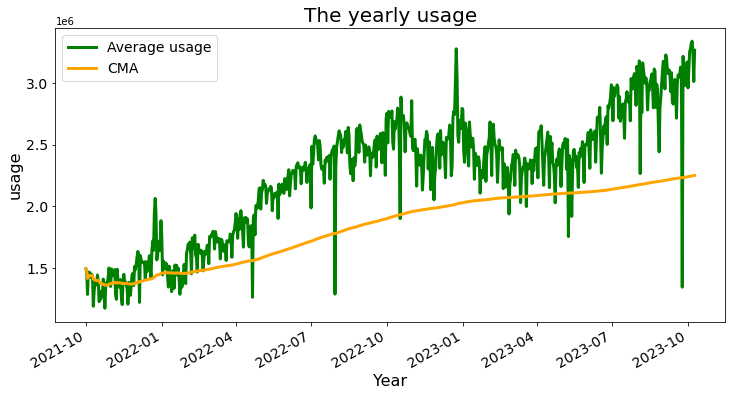

In [115]:
df['CMA'] = df.usage_mins.expanding().mean()

# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']
# line plot
df[['usage_mins', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average usage', 'CMA'], fontsize=14)
plt.title('The yearly usage', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('usage', fontsize=16)

In [116]:
df.columns

Index(['no_of_calls', 'usage_mins', 'tarriff_rate', 'termination_rate',
       'rtgs_rate', 'usage First Difference', 'Seasonal First Difference',
       'forecast', 'CMA'],
      dtype='object')

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

Root Mean Squared Error (RMSE): nan


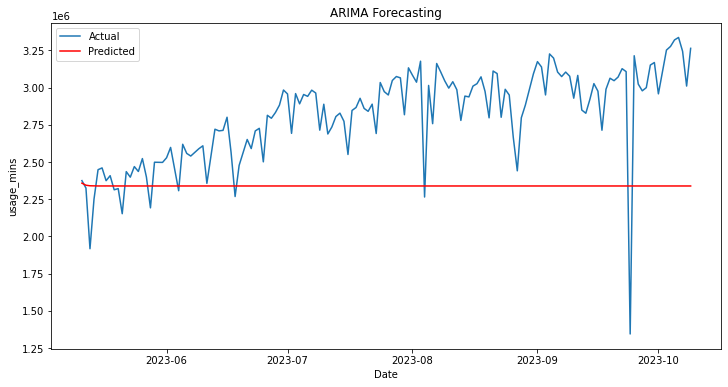

Forecasted values:
586    2.358210e+06
587    2.344313e+06
588    2.340602e+06
589    2.339611e+06
590    2.339347e+06
591    2.339276e+06
592    2.339257e+06
593    2.339252e+06
594    2.339251e+06
595    2.339251e+06
Name: predicted_mean, dtype: float64


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [139]:
# Define independent variables (features) and dependent variable (target)
independent_vars = ['no_of_calls', 'tarriff_rate', 'termination_rate', 'rtgs_rate']
dependent_var = 'usage_mins'

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Create and fit the ARIMA model
model = ARIMA(train_data[dependent_var], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = np.sqrt(np.mean((test_data[dependent_var] - predictions) ** 2))

# Print RMSE
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[dependent_var], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel(dependent_var)
plt.legend()
plt.show()

# Forecast future values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted values:")
print(forecast)

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

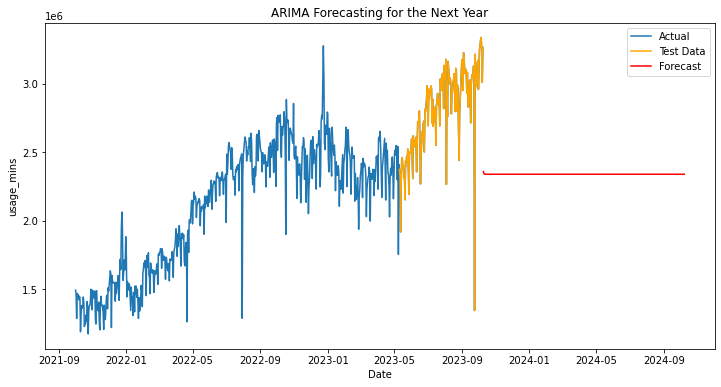

In [121]:
# Define independent variables (features) and dependent variable (target)
independent_vars = ['no_of_calls', 'tarriff_rate', 'termination_rate', 'rtgs_rate']
dependent_var = 'usage_mins'

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Create and fit the ARIMA model
model = ARIMA(train_data[dependent_var], order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next year (365 days)
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the actual vs. predicted values for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[dependent_var], label='Actual')
plt.plot(test_data.index, test_data[dependent_var], label='Test Data', color='orange')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecasting for the Next Year')
plt.xlabel('Date')
plt.ylabel(dependent_var)
plt.legend()
plt.show()


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\uddandam.prakash\AppData\Local\Temp\ipykernel_3956\105321167.py:26: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=test_data.index[-1], periods=forecas

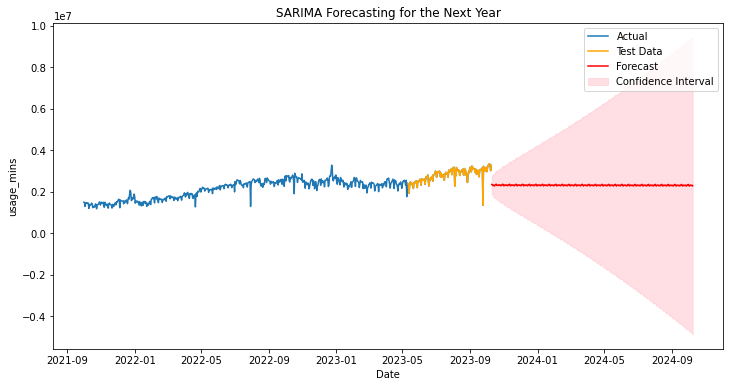

In [125]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define independent variables (features) and dependent variable (target)
independent_vars = ['no_of_calls', 'tarriff_rate', 'termination_rate', 'rtgs_rate']
dependent_var = 'usage_mins'

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Create and fit the SARIMA model
model = SARIMAX(train_data[dependent_var], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast for the next year (365 days)
forecast_steps = 365
forecast = model_fit.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=test_data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the actual vs. predicted values for the entire dataset, including the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[dependent_var], label='Actual')
plt.plot(test_data.index, test_data[dependent_var], label='Test Data', color='orange')
plt.plot(forecast_dates, forecasted_values, label='Forecast', color='red')
plt.fill_between(forecast_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('SARIMA Forecasting for the Next Year')
plt.xlabel('Date')
plt.ylabel(dependent_var)
plt.legend()
plt.show()


In [ ]:
# test data

In [127]:
df21=pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')

In [128]:
df21['part_date'] = pd.to_datetime(df21['part_date'], format='%Y%m%d')


In [130]:


## Cleaning up the data
df21.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
df21.head()



,Date,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate
0,2021-10-01,1701336,1492856,2.8083,0.2,175
1,2021-10-02,1696106,1467425,2.8083,0.2,175
2,2021-10-03,1453001,1285924,2.8083,0.2,175
3,2021-10-04,1640321,1468526,2.8083,0.2,175
4,2021-10-05,1634891,1458419,2.8083,0.2,175


In [132]:
df21.set_index('Date', inplace=True)

In [136]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Assuming you have already fitted an ARIMA model, let's use model_fit for prediction
# If not, you can fit the model using your original training data (train_data)
# model = ARIMA(train_data[dependent_var], order=(1, 1, 1))
# model_fit = model.fit()

# Make predictions on the new dataset
predictions = model_fit.forecast(steps=len(df21.usage_mins))

# Assuming 'dependent_var' is the dependent variable of the new dataset
df21['predicted_values'] = predictions

# Print or analyze the predicted values in the new dataset
print(df21.head())


            no_of_calls  usage_mins  tarriff_rate  termination_rate  \
Date                                                                  
2021-10-01      1701336     1492856        2.8083               0.2   
2021-10-02      1696106     1467425        2.8083               0.2   
2021-10-03      1453001     1285924        2.8083               0.2   
2021-10-04      1640321     1468526        2.8083               0.2   
2021-10-05      1634891     1458419        2.8083               0.2   

            rtgs_rate  predicted_values  
Date                                     
2021-10-01        175               NaN  
2021-10-02        175               NaN  
2021-10-03        175               NaN  
2021-10-04        175               NaN  
2021-10-05        175               NaN  


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [137]:
df21['predicted_values'].max()

nan

In [142]:
df21.shape

(733, 6)

In [144]:
train_data.shape

(586, 9)

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\uddandam.prakash\AppData\Local\Temp\ipykernel_3956\228491120.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  prediction_dates = pd.date_range(start=df21.index[-1], periods=len(df21), closed='right')


ValueError: x and y must have same first dimension, but have shapes (732,) and (733,)

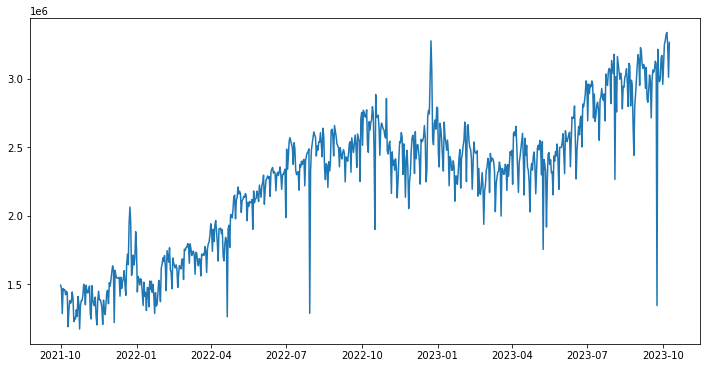

In [141]:
# Assuming you have already fitted an ARIMA model, let's use model_fit for prediction
# If not, you can fit the model using your original training data (train_data)
# model = ARIMA(train_data[dependent_var], order=(1, 1, 1))
# model_fit = model.fit()

# Make predictions on the new dataset
predictions = model_fit.forecast(steps=len(df21))

# Create a date range for the prediction period
prediction_dates = pd.date_range(start=df21.index[-1], periods=len(df21), closed='right')

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df21.index, df21[dependent_var], label='Actual')
plt.plot(prediction_dates, predictions, label='Predicted', color='red')
plt.title('ARIMA Predictions on New Data')
plt.xlabel('Date')
plt.ylabel(dependent_var)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming your data is in a DataFrame called 'df' and the dependent variable is named 'target'
X = df.drop(columns=['target'])
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
future_data = ...  # Replace this with your future data for which predictions are needed
predictions = best_model.predict(future_data)
